In [10]:
!pip install tensorflow

In [ ]:
!pip uninstall keras

In [155]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

import tensorflow as tf

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## WHOLE LANES

In [6]:
#### WITTHOUT SETTING NUMBER OF EACH CORNERS ####
#### FINALQ
##only 19 

beginner_path = 'beginner_expert_processedData/beginner/beginner_'
expert_path = 'beginner_expert_processedData/expert/expert_'
left_column = [
#'Time','Distance','Corr Dist','Corr Dist (Unstretched)','Session Time Left',
'GPS Latitude','GPS Longitude','Damper Velocity (Calc) FL','Damper Velocity (Calc) FR','Damper Velocity (Calc) RL',
'Damper Velocity (Calc) RR','Corr Speed','Brake Pos',
'CG Accel Lateral','CG Accel Longitudinal','CG Accel Vertical','CG Height','Camber FL','Camber FR','Camber RL','Camber RR','Car Coord X',
'Car Coord Y','Car Coord Z','Car Pos Norm','Chassis Pitch Angle','Chassis Pitch Rate','Chassis Roll Angle','Chassis Roll Rate',
'Chassis Velocity X','Chassis Velocity Y','Chassis Velocity Z','Chassis Yaw Rate','Drive Train Speed','Engine RPM','Ground Speed',
'Ride Height FL','Ride Height FR','Ride Height RL','Ride Height RR','Road Temp','Self Align Torque FL','Self Align Torque FR',
'Self Align Torque RL','Self Align Torque RR','Steering Angle','Suspension Travel FL','Suspension Travel FR',
'Suspension Travel RL','Suspension Travel RR','Tire Load FL','Tire Load FR','Tire Load RL','Tire Load RR','Tire Loaded Radius FL',
'Tire Loaded Radius FR','Tire Loaded Radius RL','Tire Loaded Radius RR','Tire Pressure FL','Tire Pressure FR','Tire Pressure RL','Tire Pressure RR',
'Tire Rubber Grip FL','Tire Rubber Grip FR','Tire Rubber Grip RL','Tire Rubber Grip RR','Tire Slip Angle FL','Tire Slip Angle FR',
'Tire Slip Angle RL','Tire Slip Angle RR','Tire Slip Ratio FL','Tire Slip Ratio FR','Tire Slip Ratio RL','Tire Slip Ratio RR',
'Tire Temp Core FL','Tire Temp Core FR','Tire Temp Core RL','Tire Temp Core RR','Tire Temp Inner FL','Tire Temp Inner FR',
'Tire Temp Inner RL','Tire Temp Inner RR','Tire Temp Middle FL','Tire Temp Middle FR','Tire Temp Middle RL',
'Tire Temp Middle RR','Tire Temp Outer FL','Tire Temp Outer FR','Tire Temp Outer RL','Tire Temp Outer RR','Toe In FL',
'Toe In FR','Toe In RL','Toe In RR','Wheel Angular Speed FL','Wheel Angular Speed FR','Wheel Angular Speed RL','Wheel Angular Speed RR',
'CG Distance','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration']

part_column = ['Brake Pos', 'Ground Speed', 'Steering Angle', 'Throttle Pos', 'Chassis Yaw Rate', 'Chassis Velocity X', 
               'Chassis Velocity Y','Chassis Velocity Z','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration', 
               'CG Distance']

curveList = [[103.9, 209.3], [316.6, 399.6], [425.3, 517.9], [590.5, 756.9], [1048.7, 1110.5], [1212.3, 1437.1]]
curve_num = 0
sequences = list()
final_df = pd.DataFrame()
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = beginner_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)

    for j in range(0, 6):
      tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
      #print(tmp_df)
      tmp_df = tmp_df.loc[:,left_column]
      #tmp_df = tmp_df.loc[:,part_column]
      tmp_df['curve_num'] = j
      #final_df = final_df.append(tmp_df, ignore_index=True)
      values = tmp_df.values
      #scaler = MinMaxScaler(feature_range=(0, 1))
      #scaled = scaler.fit_transform(values)
      sequences.append(values)

    
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = expert_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)
    for j in range(0, 6):
      tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
      tmp_df = tmp_df.loc[:,left_column]
      #tmp_df = tmp_df.loc[:,part_column]
      tmp_df['curve_num'] = j
      values = tmp_df.values
      #scaler = MinMaxScaler(feature_range=(0, 1))
      #scaled = scaler.fit_transform(values)
      sequences.append(values)
    

## EACH LANES

In [ ]:
#### WITTHOUT SETTING NUMBER OF EACH CORNERS ####
#### FINALQ
##only 19 

beginner_path = 'beginner_expert_processedData/beginner/beginner_'
expert_path = 'beginner_expert_processedData/expert/expert_'
left_column = [
#'Time','Distance','Corr Dist','Corr Dist (Unstretched)','Session Time Left',
'GPS Latitude','GPS Longitude','Damper Velocity (Calc) FL','Damper Velocity (Calc) FR','Damper Velocity (Calc) RL',
'Damper Velocity (Calc) RR','Corr Speed','Brake Pos',
'CG Accel Lateral','CG Accel Longitudinal','CG Accel Vertical','CG Height','Camber FL','Camber FR','Camber RL','Camber RR','Car Coord X',
'Car Coord Y','Car Coord Z','Car Pos Norm','Chassis Pitch Angle','Chassis Pitch Rate','Chassis Roll Angle','Chassis Roll Rate',
'Chassis Velocity X','Chassis Velocity Y','Chassis Velocity Z','Chassis Yaw Rate','Drive Train Speed','Engine RPM','Ground Speed',
'Ride Height FL','Ride Height FR','Ride Height RL','Ride Height RR','Road Temp','Self Align Torque FL','Self Align Torque FR',
'Self Align Torque RL','Self Align Torque RR','Steering Angle','Suspension Travel FL','Suspension Travel FR',
'Suspension Travel RL','Suspension Travel RR','Tire Load FL','Tire Load FR','Tire Load RL','Tire Load RR','Tire Loaded Radius FL',
'Tire Loaded Radius FR','Tire Loaded Radius RL','Tire Loaded Radius RR','Tire Pressure FL','Tire Pressure FR','Tire Pressure RL','Tire Pressure RR',
'Tire Rubber Grip FL','Tire Rubber Grip FR','Tire Rubber Grip RL','Tire Rubber Grip RR','Tire Slip Angle FL','Tire Slip Angle FR',
'Tire Slip Angle RL','Tire Slip Angle RR','Tire Slip Ratio FL','Tire Slip Ratio FR','Tire Slip Ratio RL','Tire Slip Ratio RR',
'Tire Temp Core FL','Tire Temp Core FR','Tire Temp Core RL','Tire Temp Core RR','Tire Temp Inner FL','Tire Temp Inner FR',
'Tire Temp Inner RL','Tire Temp Inner RR','Tire Temp Middle FL','Tire Temp Middle FR','Tire Temp Middle RL',
'Tire Temp Middle RR','Tire Temp Outer FL','Tire Temp Outer FR','Tire Temp Outer RL','Tire Temp Outer RR','Toe In FL',
'Toe In FR','Toe In RL','Toe In RR','Wheel Angular Speed FL','Wheel Angular Speed FR','Wheel Angular Speed RL','Wheel Angular Speed RR',
'CG Distance','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration']

part_column = ['Brake Pos', 'Ground Speed', 'Steering Angle', 'Throttle Pos', 'Chassis Yaw Rate', 'Chassis Velocity X', 
               'Chassis Velocity Y','Chassis Velocity Z','Lateral Velocity','Longitudinal Velocity','Lateral Acceleration','Longitudinal Acceleration', 
               'CG Distance']

curveList = [[103.9, 209.3], [316.6, 399.6], [425.3, 517.9], [590.5, 756.9], [1048.7, 1110.5], [1212.3, 1437.1]]
curve_num = 0
sequences = list()
final_df = pd.DataFrame()
j = 5
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = beginner_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)
    tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
    #print(tmp_df)
    #tmp_df = tmp_df.loc[:,left_column]
    tmp_df = tmp_df.loc[:,part_column]
    #tmp_df['curve_num'] = j
    #final_df = final_df.append(tmp_df, ignore_index=True)
    values = tmp_df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    sequences.append(values)

    
for i in range(1,20):
    final_df = pd.DataFrame()
    file_path = expert_path + str(i) + '_new2.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df = df.dropna()
    df = df.astype(float)
    tmp_df = df[(df['Distance'] >= curveList[j][0]) & (df['Distance'] <= curveList[j][1])]
    #tmp_df = tmp_df.loc[:,left_column]
    tmp_df = tmp_df.loc[:,part_column]
    #tmp_df['curve_num'] = j
    values = tmp_df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    sequences.append(values)
    

In [7]:

print(len(sequences))
print(sequences[1].shape)

228
(46, 99)


In [8]:
targets = pd.read_csv('target.csv')
targets = targets.values[:,1]
groups = pd.read_csv('group.csv', header=0)
groups = groups.values[:,1]

In [9]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
    
print(len_sequences)
pd.Series(len_sequences).describe()

[72, 46, 492, 111, 28, 125, 71, 57, 214, 98, 27, 148, 78, 49, 318, 105, 26, 151, 91, 43, 311, 88, 27, 146, 68, 50, 429, 115, 31, 129, 69, 54, 102, 105, 31, 147, 75, 61, 73, 112, 30, 145, 84, 58, 77, 95, 30, 131, 76, 50, 124, 94, 34, 145, 79, 51, 94, 108, 30, 146, 97, 59, 121, 127, 41, 154, 102, 68, 218, 140, 36, 150, 101, 50, 833, 135, 37, 194, 89, 48, 695, 99, 33, 156, 63, 69, 110, 97, 36, 183, 74, 59, 90, 86, 29, 136, 80, 60, 80, 90, 28, 142, 69, 48, 329, 111, 31, 121, 78, 52, 73, 97, 25, 494, 68, 51, 71, 87, 25, 123, 64, 45, 68, 86, 26, 132, 64, 46, 69, 86, 26, 124, 71, 50, 67, 84, 26, 125, 68, 53, 68, 81, 27, 117, 65, 48, 81, 81, 25, 126, 66, 47, 69, 111, 25, 129, 66, 46, 69, 88, 26, 119, 67, 44, 72, 80, 26, 126, 66, 45, 77, 78, 25, 122, 72, 52, 69, 77, 25, 133, 66, 47, 70, 77, 25, 126, 67, 45, 79, 84, 25, 128, 70, 46, 71, 80, 26, 125, 68, 47, 78, 77, 25, 138, 62, 47, 69, 79, 25, 117, 68, 43, 113, 79, 25, 127, 66, 44, 77, 80, 25, 133, 72, 43, 76, 84, 25, 131]


count    228.000000
mean      92.622807
std       90.949508
min       25.000000
25%       48.750000
50%       73.000000
75%      111.000000
max      833.000000
dtype: float64

In [10]:
#Padding the sequence with the values in last row to max length
#to_pad = 1816
to_pad = 833
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(99, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

#truncate the sequence to length 60
from keras.preprocessing import sequence
seq_len = 60
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [11]:
len(final_seq)

228

## FOR EACH LANE

In [ ]:
# Modifying Sequence

train = [final_seq[i] for i in range(len(final_seq)) if (groups[i]==1)]
validation = [final_seq[i] for i in range(len(final_seq)) if groups[i]==2]
test = [final_seq[i] for i in range(len(final_seq)) if groups[i]==3]

train_target = [targets[i] for i in range(len(final_seq)) if (groups[i]==1)]
validation_target = [targets[i] for i in range(len(final_seq)) if groups[i]==2]
test_target = [targets[i] for i in range(len(final_seq)) if groups[i]==3]

train

## ENTIRE LANE

In [12]:
# Modifying Sequence

train = [final_seq[i] for i in range(len(final_seq)) if (groups[int(i/6)]==1)]
validation = [final_seq[i] for i in range(len(final_seq)) if groups[int(i/6)]==2]
test = [final_seq[i] for i in range(len(final_seq)) if groups[int(i/6)]==3]

train_target = [targets[int(i/6)] for i in range(len(final_seq)) if (groups[int(i/6)]==1)]
validation_target = [targets[int(i/6)] for i in range(len(final_seq)) if groups[int(i/6)]==2]
test_target = [targets[int(i/6)] for i in range(len(final_seq)) if groups[int(i/6)]==3]

train

[array([[  44.0537143 ,  -78.6816904 ,   18.4       , ...,  -18.00508582,
           21.60610253,    0.        ],
        [  44.0536929 ,  -78.68168383,  204.3       , ..., -154.84373586,
          -21.6061031 ,    0.        ],
        [  44.05367419,  -78.68167799, -305.8       , ..., -111.63153022,
           -7.20203456,    0.        ],
        ...,
        [  44.05316104,  -78.68123219,   28.1       , ...,   10.80305098,
           28.80813709,    0.        ],
        [  44.05316167,  -78.68122149, -130.6       , ...,   14.40406854,
            3.60101756,    0.        ],
        [  44.0531623 ,  -78.68121079,   66.3       , ...,   36.01017136,
            7.20203456,    0.        ]]),
 array([[ 4.40535036e+01, -7.86801855e+01,  5.79000000e+01, ...,
         -2.84511756e-07,  1.80050855e+01,  1.00000000e+00],
        [ 4.40535081e+01, -7.86801700e+01,  1.33000000e+02, ...,
         -1.08030516e+01, -1.44040691e+01,  1.00000000e+00],
        [ 4.40535123e+01, -7.86801553e+01,  1.708

In [13]:
test_target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
groups

In [14]:
train = np.array(train)
validation = np.array(validation)
test = np.array(test)

train_target = np.array(train_target)
validation_target = np.array(validation_target)
test_target = np.array(test_target)

print(train.shape)
print(train_target.shape)

(156, 60, 99)
(156,)


In [15]:
#!pip install keras-tuner
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow import keras

In [17]:
from tensorflow.keras.models import Sequential
#alpha?
def build_model(hp):
  model = Sequential()
  model.add(LSTM(units=hp.Int('units', min_value=32, max_value=1024,step=32), input_shape=(seq_len, 99)))
  model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(
      hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  ), metrics=['accuracy'])
  return model

tuner=RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=2,
    directory='my_dir',
    project_name='PARTdriverLSTM.....allll'
    #project_name='driverLSTM_mod'
)

callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
tuner.search(train, train_target, epochs=70, validation_data=(validation,validation_target), callbacks=[callback])
tuner.results_summary()

Trial 15 Complete [00h 01m 01s]
val_accuracy: 0.6944444477558136

Best val_accuracy So Far: 0.75
Total elapsed time: 00h 12m 09s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in my_dir\PARTdriverLSTM.....allll
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 928
dropout: 0.25
learning_rate: 0.001
Score: 0.75
Trial summary
Hyperparameters:
units: 928
dropout: 0.35000000000000003
learning_rate: 0.0001
Score: 0.7361111044883728
Trial summary
Hyperparameters:
units: 736
dropout: 0.15000000000000002
learning_rate: 0.001
Score: 0.722222238779068
Trial summary
Hyperparameters:
units: 704
dropout: 0.35000000000000003
learning_rate: 0.001
Score: 0.7222222089767456
Trial summary
Hyperparameters:
units: 512
dropout: 0.1
learning_rate: 0.0001
Score: 0.7222222089767456
Trial summary
Hyperparameters:
units: 256
dropout: 0.30000000000000004
learning_rate: 0.001
Score: 0.7083333134651184
Trial summary
Hyperparameters:
units: 9

In [147]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 99),return_sequences = True))
model.add(Dropout(rate=0.3))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(rate=0.3))
#model.add(LSTM(56, return_sequences = False))
#model.add(Dropout(rate=0.3))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
modelnamepath = "LSTM(256,128)DENSE(64)"

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 60, 256)           364544    
_________________________________________________________________
dropout_48 (Dropout)         (None, 60, 256)           0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 60, 128)           197120    
_________________________________________________________________
dropout_49 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
dense_48 (Dense)             (None, 60, 64)            8256      
_________________________________________________________________
dense_49 (Dense)             (None, 60, 1)             65        
Total params: 569,985
Trainable params: 569,985
Non-trainable params: 0
_______________________________________________

In [238]:
model = Sequential()
model.add(GRU(1024, input_shape=(seq_len, 99),return_sequences = True))
model.add(Dropout(rate=0.3))
model.add(GRU(512, input_shape=(seq_len, 99),return_sequences = False))
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
modelnamepath = "GRU(1024)GRU(512)Dense(64)Dense(1)"#,128)DENSE(64)"

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_20 (GRU)                 (None, 60, 1024)          3456000   
_________________________________________________________________
dropout_58 (Dropout)         (None, 60, 1024)          0         
_________________________________________________________________
gru_21 (GRU)                 (None, 512)               2362368   
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 65        
Total params: 5,851,265
Trainable params: 5,851,265
Non-trainable params: 0
___________________________________________

In [239]:
adam = Adam(lr=0.001)
early_stopping = EarlyStopping(monitor = 'val_loss',patience=30)
model_chk = ModelCheckpoint(filepath='my_dir/'+modelnamepath+'{epoch}-{val_loss:.2f}-{val_accuracy:.2f}.h5', monitor='val_accuracy', save_best_only=True, mode='max',verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model.fit(train, train_target, epochs=200, batch_size=256, callbacks=[model_chk,early_stopping], validation_data=(validation,validation_target))

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 0.7139 - accuracy: 0.5192 - val_loss: 1.1213 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to my_dir\GRU(1024)GRU(512)Dense(64)Dense(1)1-1.12-0.50.h5
Epoch 2/200
1/1 [==============================] - 4s 4s/step - loss: 1.0436 - accuracy: 0.5000 - val_loss: 0.6720 - val_accuracy: 0.5833

Epoch 00002: val_accuracy improved from 0.50000 to 0.58333, saving model to my_dir\GRU(1024)GRU(512)Dense(64)Dense(1)2-0.67-0.58.h5
Epoch 3/200
1/1 [==============================] - 4s 4s/step - loss: 0.6411 - accuracy: 0.6410 - val_loss: 0.7784 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.58333
Epoch 4/200
1/1 [==============================] - 3s 3s/step - loss: 0.7288 - accuracy: 0.5256 - val_loss: 0.7601 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.58333
Epoch 5/200
1/1 [==============================] - 4s 4s/step - loss: 0.6

1/1 [==============================] - 3s 3s/step - loss: 0.1492 - accuracy: 0.9423 - val_loss: 0.9329 - val_accuracy: 0.6944

Epoch 00041: val_accuracy did not improve from 0.77778
Epoch 42/200
1/1 [==============================] - 3s 3s/step - loss: 0.1851 - accuracy: 0.9231 - val_loss: 0.6892 - val_accuracy: 0.7500

Epoch 00042: val_accuracy did not improve from 0.77778
Epoch 43/200
1/1 [==============================] - 3s 3s/step - loss: 0.0992 - accuracy: 0.9808 - val_loss: 0.5147 - val_accuracy: 0.8333

Epoch 00043: val_accuracy improved from 0.77778 to 0.83333, saving model to my_dir\GRU(1024)GRU(512)Dense(64)Dense(1)43-0.51-0.83.h5
Epoch 44/200
1/1 [==============================] - 4s 4s/step - loss: 0.1119 - accuracy: 0.9808 - val_loss: 0.6295 - val_accuracy: 0.7778

Epoch 00044: val_accuracy did not improve from 0.83333
Epoch 45/200
1/1 [==============================] - 4s 4s/step - loss: 0.0912 - accuracy: 0.9744 - val_loss: 0.6344 - val_accuracy: 0.8056

Epoch 00045: va

2/2 [==============================] - 1s 104ms/step - loss: 0.8454 - accuracy: 0.7222


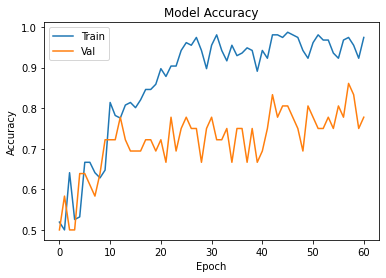

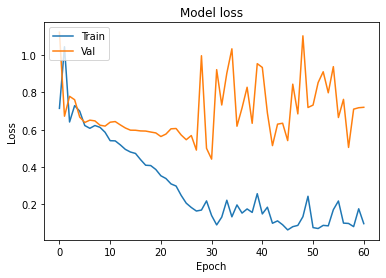

In [240]:
model= keras.models.load_model('my_dir/GRU(1024)GRU(512)Dense(64)Dense(1)58-0.50-0.86.h5')
model.evaluate(test,test_target)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()